In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (StandardScaler, Binarizer, OrdinalEncoder, OneHotEncoder)
from sklearn.metrics import (confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve)
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# COGS 118A - Final Project

# Predicting HB-1 Visa Certification: A Machine Learning Approach Using Employer and Work Information


## Group members

- Zaki Ahmed
- Shay Samat
- Aditya Tomar
- Akhil Vasanth

# Abstract 
The goal of this project is to create a machine learning model that can predict whether an HB-1 visa will get certified or denied based on the company sponsoring the applicant. The dataset we are using for this project contains 25 columns of data spanning from 2011-2018 filed by various companies and contains features such as the employer and work’s state and location, as well as SOC code, information about wages, and many other relevant details. We will be performing EDA on this dataset to better understand which features are more or less important in determining whether an application is certified or denied. We plan on using ML models, Random Forest, Logistic Regression, SVM, and KNN to build a predictive model that can classify H1-B applications based on the sponsoring company. The success of our models will be measured by using F1 score and ROC-AUC with accuracy calculated for comparison purposes. 


__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

H1-B visas is a very important program that allows companies in the U.S to hire specialized and talented foreign workers in technical positions<a name="mpinote"></a>[<sup>[1]</sup>](#mpinote). This is extremely important for companies when they want to fill key roles in their organizations. Though many people understand the importance of this visa type there are those who see threats. One of the biggest threats is that it can displace workers and depress wages. 
The USCIS provides a set of guidelines for applying for the H1-B and other Visa types but more importantly, it provides a set of rules that employers must follow. 
With many people from outside of the U.S. wanting to work here, there is plenty of demand for ways to predict if you can get an H1B visa. So, there has been some research that has aimed to predict whether an employee will have their H1B application certified or not. 
One research paper<a name="iqbalnote"></a>[<sup>[2]</sup>](#iqbalnote) used primarily characteristics about the employee and their job position to predict this. The features were the employee name, petition year, SOC code, job name, wage, full-time position(boolean), and work site. It used K-Means Clustering to analyze the dataset and tested two classifiers, Random Forest Classifier and Logistic Regression; it found that Logistic Regression classifies better with an accuracy score of 87%, while Random Forest Classifier had an accuracy score of 72%

Another research article<a name="rananote"></a>[<sup>[3]</sup>](#rananote) used characteristics of the applicant, the company, and industry they were to create a prediction model that accurately predicts whether an H1B application will be certified, denied, withdrawn or certified withdrawn. This research team used seven ML models including, Decision Tree, SVM, Neural Network, Linear Regression, Naive Bayes, Random Forest, and C5.0, as well as a machine ensemble method (combining all the models to make a better classifier). The models are trained and tested on applications/petitions from 2015 to 2017 and utilizes 20 features. These 20 features included information about the employer and worksite location, wages, H1-B dependence and SOC name (names for different occupation classifications). For all models, train test split is 70-30 and validation of the models is done with 10-fold cross validation. The results from this team states that C5.0 had best single model accuracy, 94.62%, but machine ensemble method had 95.4% accuracy.

Our final research paper<a name="paulnote"></a>[<sup>[4]</sup>](#paulnote) we found focuses on trying to come to a conclusion of why there was a surge in denial rates after the 2017 “Buy American and Hire American” Executive Order (EO). This article uses 4 ML models, Logistic Regression, XGBoost, Linear Discriminant, and Naïve Bayes. The validation of these models were computed through 5-fold cross validation. The model uses both firm and applicant characteristics. Applicant characteristic features span from education level (degree), occupation, and nationality. The firm features consist of the state in which they are in, the location of their headquarters, whether they are publicly traded, and H1 Dependent. Out of the 4 ML models used, it found that linearly dependent models outperformed XGBoost. Logistic Regression had the best accuracy, with 93% in the pre-treatment, and 82% in the post-treatment, Linear Discriminant had 91% in the pre-treatment and 81% in the post-treatment, Naïve Bayes had 92% in the pre-treatment and 81% in the post-treatment, and finally XGBoost had 90% in the pre-treatment and 80% in the post-treatment. Overall these results are fairly similar, however XGBoost takes into account potential non-linearities decision-boundaries, which is why for the rest of the paper they focused on the best linear model, logistic regression and also XGBoost.
In conclusion, the H1-B visa program is one of the most critical parts of the US economy because it allows foreign workers to fill in technical roles. Although we see this as a benefit, the program has received lots of criticism for some displacement of American workers and low wages. Due to this the USCIS created a list of guidelines to apply for the H1-B visa program. Based on these guidelines and access to the datasets, many machine learning models were created to predict the chance of approval for this visa. What makes our approach different is that we will be focusing on employer/company metrics, rather than employee/applicant metrics as focused on in the articles above. 

# Problem Statement

How accurately can we predict whether an H1B application will be certified or denied, based on the size, location, industry, and sales volume of the company sponsoring the employee and the details of the job being applied for (wage, job title, full time status)? What classifier can predict H-1B acceptance/denial with the greatest accuracy score? 

Our problem statement’s motivation is to find whether the metrics of the H1B sponsoring employer have a significant predictive value on approval odds of the H1B application and whether using this information can generate better predictions than not using them. All research data we have seen thus far do not use demographic/financial info of the company, rather they use demographic data from applicants. We think this is likely an oversight as H-1B applications are submitted by companies rather than individuals so we hypothesize company metrics might be more useful than individual demographic information in the context of H-1B applications.


# Data
- H-1B Non-Immigrant Labour Visa
- Link via Kaggle: https://www.kaggle.com/datasets/thedevastator/h-1b-non-immigrant-labour-visa
- Contains information on H-1B visa applications made by US employers
- **There are 3.36 million observations or applications with 25 variables/columns**
- Primary feature of interest is “case_status”
- Includes whether the application is certified, certified withdrawn or withdrawn
- It is a finite set of discrete values that are not numerical
- Stored as a categorical string encoding whether or not the case was approved
The features that are pertinent can be divided into 4 broad groups:
- Features about Location
  - **location** (feature engineered)
    - use **emp_zip** and make general geographic locations of regions (NESW)
    - Categorical type data
- Features about Wage
  - Conversion using **wage_unit** (feature engineered)
    - **wage_unit** describes hourly or yearly
    - Use this to convert all wage values that are hourly to yearly because 93% of values are yearly
    - This will allow for the wages to be directly comparable
- Features about Employer Data
  - **job demand** (feature engineered)
    - count the number of applications submitted per employer, the more applications, the more demand
  - **emp_h1b_dependent**
    - Whether the employer is H-1B dependent or not. (Boolean)
    - Categorical type data
  - **emp_willful_violator**
    - Whether the employer is a willful violator or not. (Boolean)
    - Categorical type data
- Features about Application
  - **Application duration** (feature engineered)
    - time it takes for application to be approved/denied
    - decision_date - case_submitted
    - Continuous numerical data type
  - **case_status**
    - the status of the case, either approved or denied. (String)
    - Categorical type data
  - **case_year**
    - the year in which the case was submitted. (Integer)
    - Ordinal type data
  - **full_time_position**
    - whether the position is full-time or not. (Boolean)
    - Categorical type data
  - **soc_field** (feature engineered)
    - By taking the first 3 numbers of **soc_code** which denotes the field of the occupation as per the SOC manual by the Department of Labor.
    - Link: https://www.bls.gov/soc/2018/soc_2018_definitions.pdf
    - We can create fields such as Top Executives, Business Operations Specialists, etc.
- Finally, The numerical features will be standard scaled, the categorical variables will be one-hot encoded and the time variables will be date-timed and converted to an ordinal scale.


Update on Employer dataset:




- We will no longer be using the employer dataset, we had quite a bit of trouble trying to find a dataset to work with, so our solution was to use feature engineering to create our own features regarding employers.
- Since we have created our own features through feature engineering, and these features are sufficient for our analysis, then we no longer need an external dataset that provides information on employers.
- The features we have generated are essentially a way of creating new variables that can capture important information about the employers in your dataset, such as their industry, company size, and wage practices.
- These new features include, **soc_field**, **company_size**, **Application duration** ,**wage_level**.
- By generating these new features, we have essentially created a more granular view of the data that we are working with, allowing us to gain insights that we might not have been able to see otherwise. In addition, by creating these features ourselves, we have more control over the quality and accuracy of the data that we are working with.

# Proposed Solution

Our approach to solving our classification problem will be to generate multiple models, refine those models’ hyperparameters, and then select the best model for final prediction evaluation based on test data unseen by any of the models to see generalization performance. We will first do an 80-20 train(/valid)-test split to allow for better model evaluation later since our dataset is so large. To solve our classification problem we will use several models from SciKit Learn and select the best model after finding the best hyperparameters for each of the models using gridsearch. The models we have in mind for classification is Random Forest, XGBoost, and AdaBoost. Since we do not know the distribution of our high dimensional dataspace, we will be thinking of these models but our decision may be and will likely be influenced by what we find in our initial EDA of the data and EDA will also provide insight into feature importance. Due to the high dimensionality of the data, PCA will likely need to be performed as dimensionality reduction before being input into training the models to improve performance. Each model’s best hyperparameters will be found using random search and then gridsearch after which each model will be compared against each other by using k-fold cross validation on the train/validation data split (80% of the data). After which each model will be tested on the completely unseen testing data split (20%) to determine generalization performance of each model. Our best resulting model will be selected with a heavy emphasis on generalization performance. We will be aiming to have better performance than the performance of previous H-1B prediction algorithms we found and will find in our research- the best of which we have seen has an accuracy of 96% for example. In addition to the models mentioned earlier, we will also be using Decision Stump and Naive Bayes as our benchmark models. These models are weaker compared to the other models, making them a good starting point to establish a baseline for comparison. Decision Stump is a simple model that makes use of a single feature, emp_willful_violator, to predict whether an application was certified or not, of the input data, making it a good baseline model for comparison with more complex models. We found during our EDA process that 99.9% of our dataset are not wilful violators, so if the company you applied for is a wilful violator, you will most likely get denied. Naive Bayes, on the other hand, is a probabilistic model that assumes that the features of the input data are independent of each other, and despite its simplifying assumption, it has been shown to work well in many real-world classification problems. 

# Evaluation Metrics

For the sake of being able to compare H-1B classification models, we will be using accuracy as our first metric. Accuracy is simply the proportion of correctly classified instances out of all instances in the dataset. Mathematically, it can be represented as: $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$ However, accuracy will not be our primary metric for overall evaluation because the classes are imbalanced. Due to this we will be using F1-score and Area Under the ROC Curve (AUC-ROC) to evaluate overall performance. We feel the costs of false positives and false negatives are roughly equivalent in the context of our model being purely for analytical purposes and not for commercial use. In the context of H-1B visa application prediction, false positives refer to cases where the model incorrectly predicts that an application will be approved, when in fact it will be denied. This can be costly for both the applicant and the employer, as they may have already invested time and resources into the application process, only to be denied. False negatives refer to cases where the model incorrectly predicts that an application will be denied, when in fact it will be approved. This can result in missed opportunities for both the applicant and the employer, as they may have been able to secure a visa if the application had been properly approved. The F1-score is the harmonic mean of precision and recall, and provides a balanced measure of the model's performance and can be represented as: $$ F1 = 2 * \frac{precision * recall}{precision + recall} $$. The AUC-ROC measures the performance of the model across all possible classification thresholds, and is useful when the threshold for classification is not known. In the context of H-1B visa application prediction, the goal will be to identify a threshold that maximizes both precision and recall since we assume them to be equally important. The AUC-ROC also measures the model's performance across all possible classification thresholds, and is calculated by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold values. The equation can be written as:  $$ AUC-ROC = \int_0^1 TPR(FPR^{-1}(t))dt $$ where $FPR^{-1}(t)$ is the inverse function of the FPR. The AUC-ROC provides a single number (between 0 and 1) that summarizes the model's performance across all thresholds, making it a useful metric for overall evaluation. F1-Score and AUC-ROC will be used for model evaluation while accuracy will primarily be used for comparison with past models with the same goal.

# Preliminary Results/EDA

#### Data Collection and Cleaning

First, we downloaded our data from Kaggle as a set of 8 .csv files. We had to split it into 8 files because of the size of the dataset. Then, we converted the 8 files into a pandas dataframe that we can manipulate.

In [2]:
# Get a list of all the CSV files
csv_files = ["data/h1b_pt"+str(i)+".csv" for i in list(range(1,9))]

# Create an empty list to hold the DataFrames
dfs = []

# Loop through each CSV file, read it into a DataFrame, and append it to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file, low_memory=False)
    dfs.append(df)

# Concatenate all the DataFrames together into a single DataFrame
h1b = pd.concat(dfs, ignore_index=True)
h1b.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,emp_country,job_title,...,pw_level,wage_from,wage_to,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,lat,lng
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,USA,NEPHROLOGIST,...,NaN,190000.00,0.0,Y,ABBEVILLE,SC,N,N,34.178172,-82.379015
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,USA,POST DOCTORAL FELLOW,...,Level I,47507.00,0.0,Y,ABERDEEN,ID,N,N,42.944078,-112.838326
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,USA,OPERATION ANALYST,...,Level I,65000.00,0.0,Y,ABERDEEN,MD,N,N,39.509556,-76.164120
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,USA,SR. INDUSTRIAL ENGINEER,...,Level II,86988.15,0.0,Y,ABERDEEN,MD,N,N,39.509556,-76.164120
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,NaN,HEMATOLOGIST/ONCOLOGIST,...,NaN,450000.00,0.0,Y,ABERDEEN,SD,N,N,45.464698,-98.486483


In [3]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360810 entries, 0 to 3360809
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   case_year             int64  
 1   case_status           object 
 2   case_submitted        object 
 3   decision_date         object 
 4   emp_name              object 
 5   emp_city              object 
 6   emp_state             object 
 7   emp_zip               object 
 8   emp_country           object 
 9   job_title             object 
 10  soc_code              object 
 11  soc_name              object 
 12  full_time_position    object 
 13  prevailing_wage       float64
 14  pw_unit               object 
 15  pw_level              object 
 16  wage_from             float64
 17  wage_to               float64
 18  wage_unit             object 
 19  work_city             object 
 20  work_state            object 
 21  emp_h1b_dependent     object 
 22  emp_willful_violator  object 
 23  lat    

Now that we have our dataset, we worked on cleaning the dataframe by removing rows with missing/null values, removing columns that we are not interested in, and converting values in some columns for easier analysis.

In [4]:
# we can view how many missing cases there are so far in each column to help identify what to drop and what to keep

h1b.isnull().sum()

case_year                     0
case_status                  15
case_submitted                0
decision_date                 0
emp_name                     81
emp_city                     58
emp_state                   123
emp_zip                      90
emp_country             1692680
job_title                    24
soc_code                    157
soc_name                  16538
full_time_position       602270
prevailing_wage             178
pw_unit                     221
pw_level                2346302
wage_from                    14
wage_to                 1723986
wage_unit                    61
work_city                     0
work_state                    0
emp_h1b_dependent       1604213
emp_willful_violator    1604212
lat                           0
lng                           0
dtype: int64

We deleted the columns we are not interested in. This includes:
- employer country(emp_country)
- prevailing wage level(pw_level)
- SOC name(soc_name)
- maximum wage for the job position(wage_to)
- latitude(lat) and longitude(lng)


In [5]:
#create a new dataframe and drop columns that aren't of interest to us

drop_cols = [
     "emp_country",
    "pw_level", 
    "soc_name", 
    "wage_to", 
    "lat", 
    "lng"
]

data = h1b.drop(drop_cols, axis=1) 

cols = data.columns

data.head()

#now, check the missing values
data.isnull().sum()

case_year                     0
case_status                  15
case_submitted                0
decision_date                 0
emp_name                     81
emp_city                     58
emp_state                   123
emp_zip                      90
job_title                    24
soc_code                    157
full_time_position       602270
prevailing_wage             178
pw_unit                     221
wage_from                    14
wage_unit                    61
work_city                     0
work_state                    0
emp_h1b_dependent       1604213
emp_willful_violator    1604212
dtype: int64

Then, we dealt with any missing values in our dataset. Since most of the columns with missing values were non-numeric and replacing the missing values with another value may result in inaccurate data, we decided to remove all rows that contained missing values.

Additionally, the case_status column in our dataset contains the class labels we want to predict. We changed the values in this column to be:
- confirmed(C), meaning the H1B application was certified by the government and not withdrawn
- not confirmed(NC), meaning the H1B application was either withdrawn(W), certified then withdrawn(CW), or denied(D)


In [6]:

data_clean = data.replace('-', np.nan).dropna(axis=0)

#we will change case_status, our labels, to be C(confirmed) and NC(not confirmed) 
#W(withdrawn), D(denied), and CW(certified-withdrawn) are all considered to be NC because in all these scenarios, 
#the applicant will not be going to the US to work on an H1B Visa
data_clean['case_status'] = data_clean['case_status'].replace(['W','D','CW'],'NC')

data_clean['case_submitted'] = data_clean['case_submitted'].apply(pd.to_datetime)
data_clean['decision_date'] = data_clean['decision_date'].apply(pd.to_datetime)

#stripping INC, INC., punctuation from employee name for better grouping results later
emp_names_cleaned = data_clean['emp_name'].str.replace(r'\s*[.,]*\s*(?:\binc\b|\bllc\b)', '', regex=True, case=False)

emp_names_cleaned = emp_names_cleaned.str.replace(r'[^\w\s]', '', regex=True)

emp_names_cleaned

0                      LAKELANDS NEPHROLOGY PA
1                          UNIVERSITY OF IDAHO
2                             XPO SUPPLY CHAIN
3                    C AND S WHOLESALE GROCERS
4                               SANFORD CLINIC
                          ...                 
1756614                          MITRA BIOTECH
1756615    CANCER TREATMENT CENTERS OF AMERICA
1756616                      BEN BOWLBY RACING
1756617                             ROCKET WEB
1756618          GUNJAN CUTTING EDGE SOLUTIONS
Name: emp_name, Length: 1154145, dtype: object

In [7]:
data_clean['emp_name'] = emp_names_cleaned
data_clean.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,job_title,soc_code,full_time_position,prevailing_wage,pw_unit,wage_from,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator
0,2017,C,2017-02-06,2017-02-10,LAKELANDS NEPHROLOGY PA,GREENWOOD,SC,29646,NEPHROLOGIST,29-1063,Y,187200.0,Y,190000.00,Y,ABBEVILLE,SC,N,N
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,POST DOCTORAL FELLOW,19-1013,Y,39957.0,Y,47507.00,Y,ABERDEEN,ID,N,N
2,2017,C,2017-03-17,2017-03-23,XPO SUPPLY CHAIN,HIGH POINT,NC,27265,OPERATION ANALYST,15-2031,Y,59966.0,Y,65000.00,Y,ABERDEEN,MD,N,N
3,2017,C,2017-03-10,2017-03-16,C AND S WHOLESALE GROCERS,KEENE,NH,03431,SR. INDUSTRIAL ENGINEER,17-2112,Y,78832.0,Y,86988.15,Y,ABERDEEN,MD,N,N
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,HEMATOLOGIST/ONCOLOGIST,29-1069,Y,169645.0,Y,450000.00,Y,ABERDEEN,SD,N,N


#### Exploratory Data Analysis

Now that our data is cleaned, we can now visualize features of interest with different plots. We used confusion matrices for binary features, bar graphs for binary and categorical features and a histogram for one of our numerical features.

The first plots we explored were confusion matrices. We had two theories: We thought that H1B Dependence and Willful Violator features affected whether or not a case was confirmed or not confirmed. We hypothesized that H1B Dependence would be a good predictor because if a company is dependent on H1B workers. Their applications may be less likely to be accepted because they already have many H1B employees. Additionally, we thoerized that a company being a willful violator of H1B rules would make their future applications extremely likely to be denied.

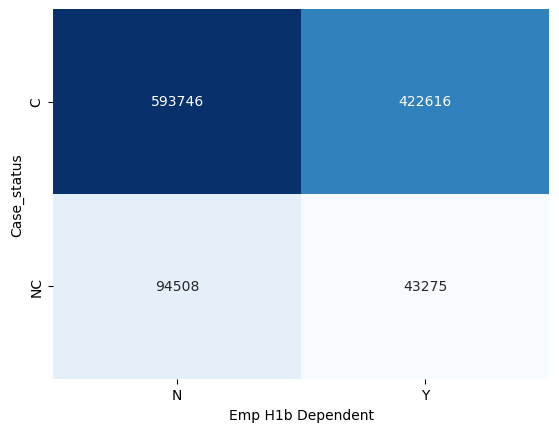

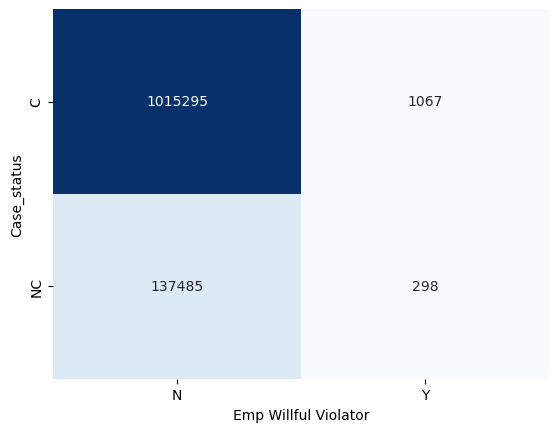

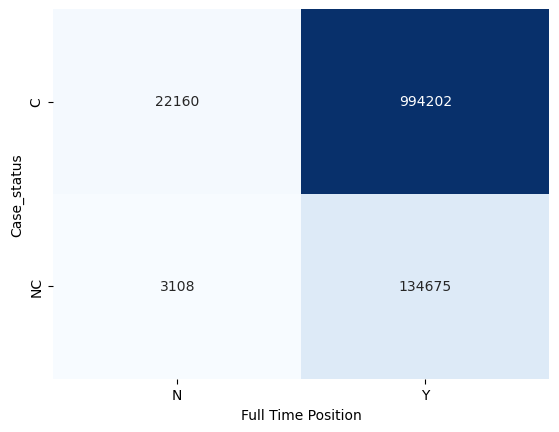

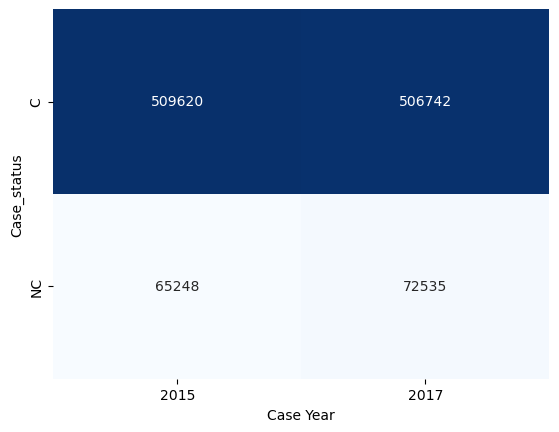

In [8]:
# Create confusion  matrix for binary features
def makeconfmatrix(feature):
    """
    creates a confusion matrix for binary features that plots Case Status and the feature parameter
    """
    le = LabelEncoder()
    a = le.fit_transform(data_clean['case_status'])
    b = le.fit_transform(data_clean[feature])  
    conf_matrix = confusion_matrix(a,b)

    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
                xticklabels=["N", "Y"], yticklabels=["C", "NC"])
    
    words = feature.split("_")

    # capitalize each word and join them back into a string
    new_string = " ".join([word.capitalize() for word in words])
    plt.xlabel(new_string)
    plt.ylabel("Case_status")
    plt.show()

makeconfmatrix('emp_h1b_dependent')
makeconfmatrix('emp_willful_violator')
makeconfmatrix('full_time_position')


#now, make a heatmap for the Case Year feature
le = LabelEncoder()
a = le.fit_transform(data_clean['case_status'])
b = le.fit_transform(data_clean['case_year'])  
conf_matrix = confusion_matrix(a,b)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["2015", "2017"], yticklabels=["C", "NC"])

plt.xlabel("Case Year")
plt.ylabel("Case_status")
plt.show()

The most notable correlation was between willful violator and case status. If an employer was not a willful violator, their chances of having their applications be confirmed were much higher.

This code performs some data preprocessing and aggregation on a cleaned dataset (data_clean) by first setting two multi-level indices on the dataframe based on 'emp_name' and 'case_status' or 'emp_h1b_dependent'. It then uses these indices to create two new dataframes, case_by_emp and h1bdep_by_emp, which group and count the number of cases for each employer by case status and by H1B dependence, respectively.

In [9]:
emp_case_idx = data_clean.set_index(['emp_name','case_status'])
emp_h1bdep_idx = data_clean.set_index(['emp_name','emp_h1b_dependent'])

case_by_emp = (
            emp_case_idx
            .groupby(['emp_name','case_status'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

h1bdep_by_emp = (
            emp_case_idx
            .groupby(['emp_name','emp_h1b_dependent'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

case_by_emp_tots = case_by_emp.sum(axis=1)
emp_case_idx = data_clean.set_index(['emp_name','case_status'])
emp_h1bdep_idx = data_clean.set_index(['emp_name','emp_h1b_dependent'])

case_by_emp = (
            emp_case_idx
            .groupby(['emp_name','case_status'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

h1bdep_by_emp = (
            emp_case_idx
            .groupby(['emp_name','emp_h1b_dependent'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

case_by_emp_tots = case_by_emp.sum(axis=1)

This function calculates the percentage of each case status (certified or denied) within each category of the specified feature. This plot can help identify any imbalances in the distribution of case statuses across different categories of the feature. For example, if a certain feature category has a much higher percentage of denied cases compared to the overall percentage of denied cases, it may indicate that this category is a risk factor for case denial and vice versa for certified cases. 

  emp_h1b_dependent case_status    percent
0                 N           C  86.268442
1                 N          NC  13.731558
2                 Y           C  90.711347
3                 Y          NC   9.288653


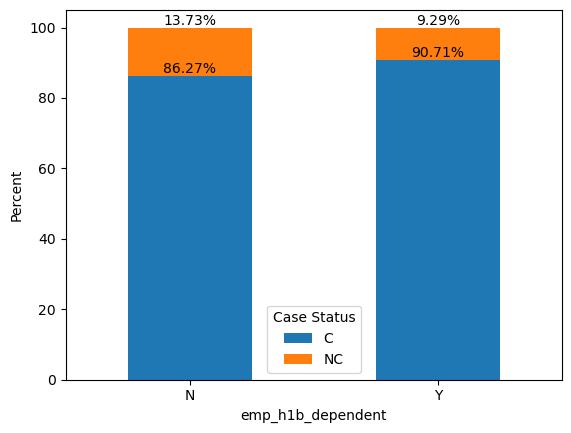

  emp_willful_violator case_status    percent
0                    N           C  88.073613
1                    N          NC  11.926387
2                    Y           C  78.168498
3                    Y          NC  21.831502


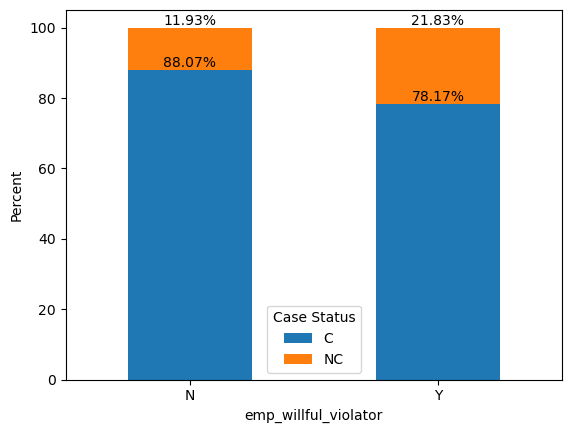

  full_time_position case_status    percent
0                  N           C  87.699858
1                  N          NC  12.300142
2                  Y           C  88.070002
3                  Y          NC  11.929998


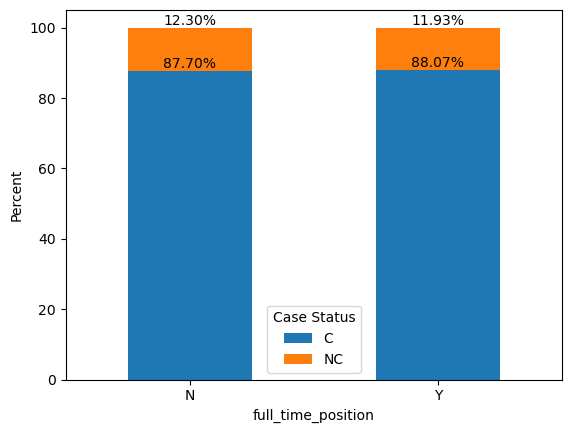

   case_year case_status    percent
0       2015           C  88.649916
1       2015          NC  11.350084
2       2017           C  87.478357
3       2017          NC  12.521643


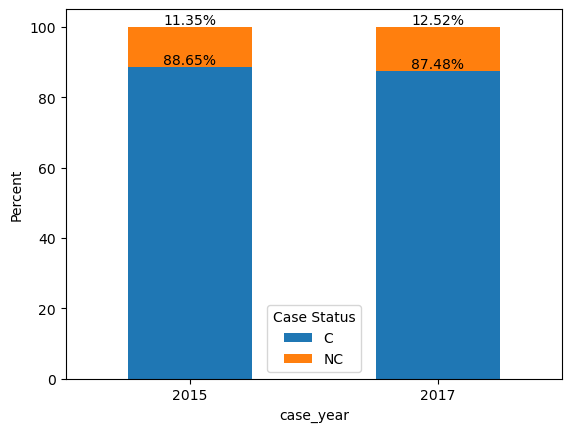

In [10]:
import matplotlib.ticker as ticker


def makebargraph(feature):
   """
   makes a bar graph for binary and categorical features
   """
   counts = data_clean.groupby(feature)['case_status'].value_counts(normalize=True)
   counts = counts.mul(100).rename('percent').reset_index()
   print(counts)
   counts = counts.pivot(index=feature, columns='case_status', values='percent')


   ax = counts.plot.bar(stacked=True, rot=0)
   ax.set_ylabel('Percent')
   ax.legend(title='Case Status')


   # Add percentage values to each bar
   for container in ax.containers:
       ax.bar_label(container, label_type='edge', labels=[f'{val:.2f}%' for val in container.datavalues])

   plt.show()

makebargraph('emp_h1b_dependent')
makebargraph('emp_willful_violator')
makebargraph('full_time_position')
makebargraph('case_year') 

The histogram of the prevailing wage can be significant because it provides an overview of the distribution of the wages in the dataset. It helps to understand the range of wages that the H1B visa applicants are earning in the United States. 

Text(0, 0.5, 'Frequency')

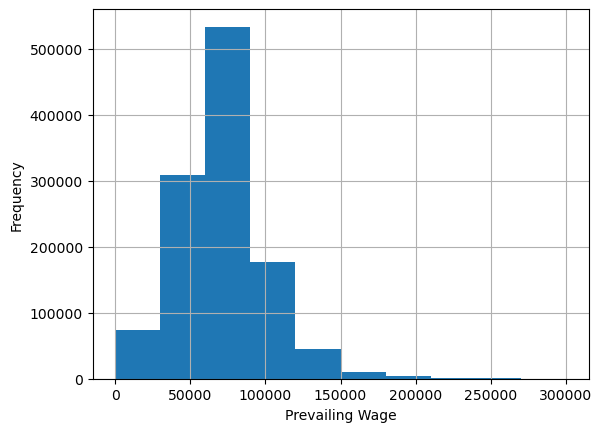

In [11]:
#make histogram for prevailing wage

data_clean['prevailing_wage'].hist(bins = 10, range = (0, 300000))
plt.xlabel('Prevailing Wage')
plt.ylabel('Frequency')

#### Feature Engineering

We crafted 5 new features from those that were in our dataset that we felt were relevant. We believe these new features could improve the predictive performance of more sophisticated models. These 5 new features are:
- Type of Occupation/SOC Field: this will give a broad occupational category based on the Dept. of Labor's SOC system
- Application Duration: the period of time between the application being submitted and the decision being made
- Location: general location (ex: SouthWest) that the employer is located in
- Yearly Prevailing Wage: expected annual salary for the job position being applied for
- Job Demand: Counts number of applications submitted to each employer to test if there is demand for these poisitions offered by employers


In [12]:
#SOC field

data_clean['soc_field'] = data_clean['soc_code'].str[:2]
data_clean['soc_code'].unique()
#cleaning up the soc_field column
#both of the occupations represented by these letters fall under 15, 
data_clean['soc_field'] = data_clean['soc_field'].replace(['CO', 'SO'], '15') 

#the occupations represented by these letters fall under 17
data_clean['soc_field'] = data_clean['soc_field'].replace(['EL', 'EN', 'ME'], '17')
data_clean['soc_field'] = data_clean['soc_field'].replace('1-', '31')
data_clean['soc_field'] = data_clean['soc_field'].replace('5-', '31')

In [13]:
#casting data_clean to data_final to preserve the original clean dataset. data_final will contain our generated features
data_final = data_clean
data_final.shape

(1154145, 20)

In [14]:
#convert prevailing wage to yearly wage based off the pw_unit column (prevailing wage unit)
conversion_factors = {'Y':1,'H':2080,'M':12,'W':52,'BW':26}
data_final['pw_yearly'] = (
        data_final.apply(lambda row: row['prevailing_wage'] * conversion_factors[row['pw_unit']], axis=1)
                           )

data_final['wage_from_yearly'] = (
    data_final.apply(lambda row: row['wage_from'] 
    * conversion_factors[row['wage_unit']], axis=1)
                                  )

In [15]:
#exploration of any discrepancy between yearly prevailing wage and yearly wage; this was not used in the final dataset
wage_diff = (
    (
    data_final['pw_yearly']-data_final['wage_from_yearly']
     )/data_final['wage_from_yearly']
    )*1.0

wage_diff.describe()

count    1.154144e+06
mean              inf
std               NaN
min     -1.000000e+00
25%     -1.549286e-01
50%     -5.290000e-02
75%      0.000000e+00
max               inf
dtype: float64

In [16]:
#Application Duration
data_final['application_duration'] = (data_clean['decision_date'] - data_clean['case_submitted']).dt.days

In [17]:
#Location
def get_location_from_zip(zip_code):
    """
    uses zip_code parameter to find the broader geographical region the employer is in
    """
    if not zip_code.isnumeric() or len(zip_code) < 5:
        return "Unknown"
    region_code = int(zip_code[0])
    if region_code == 0 or region_code == 1:
        return "Northeast"
    elif region_code == 7 or region_code == 3 or region_code == 2:
        return "South"
    elif region_code == 4 or region_code == 5 or region_code == 6:
        return "Midwest"
    elif region_code == 8 or region_code == 9:
        return "West"
    else:
        return "Unknown"

data_final['location'] = data_clean['emp_zip'].apply(get_location_from_zip)

In [18]:
data_final.shape


(1154145, 24)

In [19]:

job_demand = data_clean.groupby('emp_name')['case_year'].transform('count')

data_final = pd.concat([data_clean, job_demand.rename('job_demand')], axis=1)

In [20]:
data_final.head(10)

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,job_title,soc_code,...,work_city,work_state,emp_h1b_dependent,emp_willful_violator,soc_field,pw_yearly,wage_from_yearly,application_duration,location,job_demand
0,2017,C,2017-02-06,2017-02-10,LAKELANDS NEPHROLOGY PA,GREENWOOD,SC,29646,NEPHROLOGIST,29-1063,...,ABBEVILLE,SC,N,N,29,187200.0,190000.00,4,South,2
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,POST DOCTORAL FELLOW,19-1013,...,ABERDEEN,ID,N,N,19,39957.0,47507.00,6,West,52
2,2017,C,2017-03-17,2017-03-23,XPO SUPPLY CHAIN,HIGH POINT,NC,27265,OPERATION ANALYST,15-2031,...,ABERDEEN,MD,N,N,15,59966.0,65000.00,6,South,37
3,2017,C,2017-03-10,2017-03-16,C AND S WHOLESALE GROCERS,KEENE,NH,03431,SR. INDUSTRIAL ENGINEER,17-2112,...,ABERDEEN,MD,N,N,17,78832.0,86988.15,6,Northeast,28
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,HEMATOLOGIST/ONCOLOGIST,29-1069,...,ABERDEEN,SD,N,N,29,169645.0,450000.00,6,Midwest,79
5,2017,C,2017-03-05,2017-03-09,SANFORD CLINIC,SIOUX FALLS,SD,57117,FAMILY MEDICINE PHYSICIAN,29-1062,...,ABERDEEN,SD,N,N,29,131581.0,131581.00,4,Midwest,79
6,2017,C,2017-07-10,2017-07-14,SANFORD CLINIC,SIOUX FALLS,SD,57117,PEDIATRICIAN,29-1065,...,ABERDEEN,SD,N,N,29,187200.0,187200.00,4,Midwest,79
7,2017,C,2017-02-22,2017-02-28,NORTHERN STATE UNIVERSITY,ABERDEEN,SD,57401,INSTRUCTOR OF BUSINESS ACCOUNTING,25-1011,...,ABERDEEN,SD,N,N,25,45010.0,51487.00,6,Midwest,3
8,2017,C,2016-10-04,2016-10-11,AVERA ST LUKES HOSPITAL,ABERDEEN,SD,57401,PEDIATRICIAN,29-1065,...,ABERDEEN,SD,N,N,29,166982.0,190000.00,7,Midwest,7
9,2017,C,2017-03-07,2017-03-13,AVERA ST LUKES HOSPITAL,ABERDEEN,SD,57401,HOSPITALIST (INTERNIST),29-1063,...,ABERDEEN,SD,N,N,29,41725.0,240000.00,6,Midwest,7


Now that we have constructed our 5 new features, we got rid of redundant features to reduce the dimensional load on future training.

In [21]:
drop_cols = [
     "emp_zip",
    "pw_unit", 
    "wage_unit",
    "work_city",
  "work_state",
  "case_submitted",
  "decision_date"
]

data_final = data_final.drop(drop_cols, axis=1, errors='ignore') 


data_final = data_final.replace('Y',1).replace('N',0)
print(data_final.shape)

necessary = False
if necessary:
  # Determine the number of rows in the DataFrame
  n_rows = data_final.shape[0]

  # Calculate the midpoint of the rows
  midpoint = n_rows // 2

  # Split the DataFrame into two parts
  part1 = data_final.iloc[:midpoint,:]
  part2 = data_final.iloc[midpoint:,:]

  # Write the two parts to separate CSV files
  part1.to_csv('data/final_data_p1.csv', index=False)
  part2.to_csv('data/final_data_p2.csv', index=False)

(1154145, 18)


#### Baseline Models

We have two baseline models that we aim to surpass in predictive power in terms of our selected error metrics. 

The first model is a simple decision stump classifier based on our findings from the confusion matrix between Willful Violator and Case Status. As per the findings, Willful Violator is heavily correlated with Case Status. This simple decision stump classifier is based on the assumption that being a willful violator would result in a rejected application.

The second model is a Naive Bayes Classifier selected as a lower bound for multivariate machine learning performance. Primarily selected for its simplicity and training speed, this model also serves as a good baseline to compare more complex models to. 

Ideally, we surpass our first baselines model in all of our evaluation metrics but we expect to outperform the second baseline model.

In [22]:
#skipping data cleaning and feature engineering steps with saved csv
file_names = ['final_data_p1.csv', 'final_data_p2.csv']

# Initialize an empty list to store the data frames
dfs = []

# Loop over the file names, read each file into a DataFrame, and append to the list
for file in file_names:
    df = pd.read_csv("data/"+file, low_memory=False)
    dfs.append(df)

# Concatenate the DataFrames in the list into a single DataFrame
data_final2 = pd.concat(dfs, axis=0)

# Reset the index of the combined DataFrame
data_final = data_final2.reset_index(drop=True)
data_final.head()

,case_year,case_status,emp_name,emp_city,emp_state,job_title,soc_code,full_time_position,prevailing_wage,wage_from,emp_h1b_dependent,emp_willful_violator,soc_field,pw_yearly,wage_from_yearly,application_duration,location,job_demand
0,2017,C,LAKELANDS NEPHROLOGY PA,GREENWOOD,SC,NEPHROLOGIST,29-1063,1,187200.0,190000.00,0,0,29,187200.0,190000.00,4,South,2
1,2017,C,UNIVERSITY OF IDAHO,MOSCOW,ID,POST DOCTORAL FELLOW,19-1013,1,39957.0,47507.00,0,0,19,39957.0,47507.00,6,West,52
2,2017,C,XPO SUPPLY CHAIN,HIGH POINT,NC,OPERATION ANALYST,15-2031,1,59966.0,65000.00,0,0,15,59966.0,65000.00,6,South,37
3,2017,C,C AND S WHOLESALE GROCERS,KEENE,NH,SR. INDUSTRIAL ENGINEER,17-2112,1,78832.0,86988.15,0,0,17,78832.0,86988.15,6,Northeast,28
4,2017,C,SANFORD CLINIC,SIOUX FALLS,SD,HEMATOLOGIST/ONCOLOGIST,29-1069,1,169645.0,450000.00,0,0,29,169645.0,450000.00,6,Midwest,79


In [23]:
#repeatable random sample of 20000 to avoid memory and time constraints for the checkpoint, if memory permitting, will use larger sample in future
df = data_final.sample(n=20000, random_state=42)

X=df[[c for c in df.columns if c!='case_status']]

y=df['case_status']

#split the data
X_train, X_test, y_train, y_test = train_test_split(
                            X, 
                            y, 
                            test_size=0.2, 
                            random_state=42, 
                            stratify=df[['emp_willful_violator']],
                            )

In [24]:
def simple_decision_stump_classifier(row):
    if row['emp_willful_violator']==0:
        return 'C'
    else:
        return 'NC'
    
dec_stump_preds_train = X_train.apply(simple_decision_stump_classifier, axis=1)
dec_stump_preds_test = X_test.apply(simple_decision_stump_classifier, axis=1)

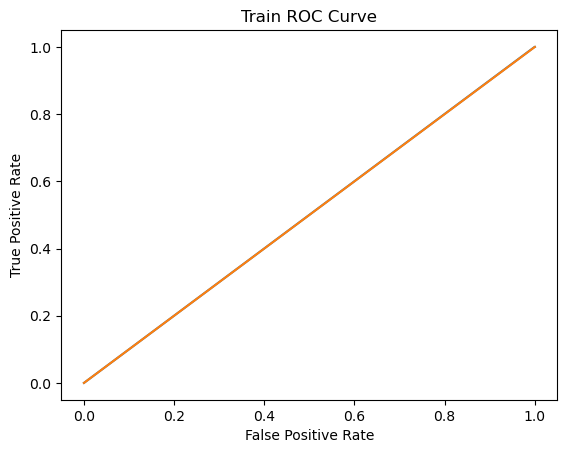

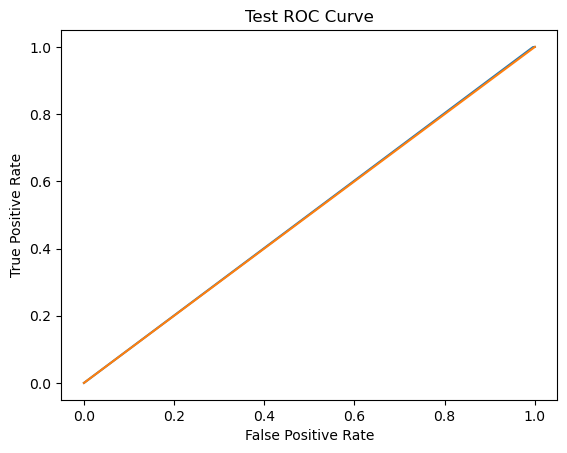

,accuracy,f1,roc score
Train,0.877563,0.934776,0.500307
Test,0.880000,0.936136,0.501799


In [25]:
def evaluate_classification(true, pred, title):
   accuracy = accuracy_score(true, pred)
   f1 = f1_score(true, pred, pos_label='C')
   roc_auc = roc_auc_score(true=='C', pred=='C')
   fpr, tpr, thresholds = roc_curve(true=='C', pred=='C')
   plt.plot(fpr, tpr)
   plt.plot([0, 1], [0, 1])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title(title +' ROC Curve')
   plt.show()
   return {'accuracy': accuracy, 'f1': f1, 'roc score': roc_auc}

e_metrics_train = evaluate_classification(
                  y_train, 
                  dec_stump_preds_train, 
                  "Train"
                  )
e_metrics_test = evaluate_classification(
                  y_test, 
                  dec_stump_preds_test, 
                  "Test"
                  )

dec_stump_errors = pd.DataFrame([e_metrics_train], index=["Train"])
dec_stump_errors.loc["Test"] = e_metrics_test

dec_stump_errors

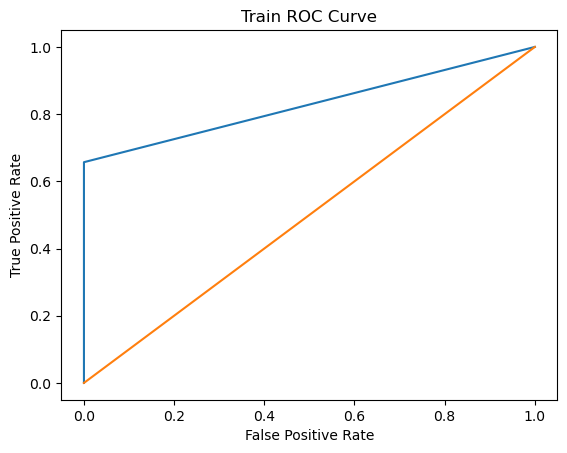

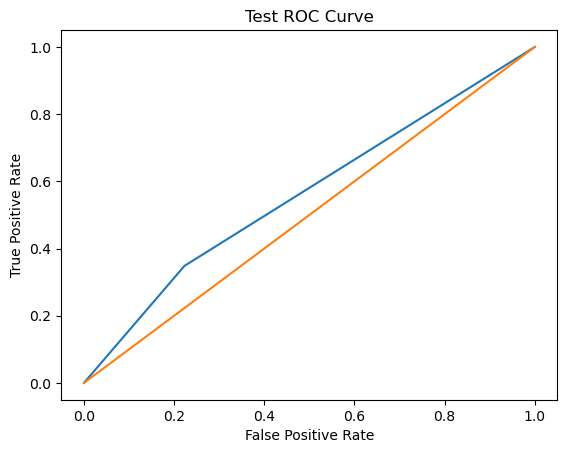

,accuracy,f1,roc score
Train,0.69875,0.792973,0.828482
Test,0.39975,0.505254,0.562689


In [26]:
ss_col = [
    'wage_from_yearly',
    'pw_yearly',
    'application_duration',
    'job_demand'
]

bin_col = [
    "emp_h1b_dependent",
    "emp_willful_violator",
    "full_time_position"
]

label_col = [
    "case_year",
]

oneh_col = [
    "soc_field",
    "emp_name",
    "location",
]

nb = GaussianNB()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ss_col),
        ('bin', Binarizer(), bin_col),
        ('label', OrdinalEncoder(), label_col),
        ('oneh', OneHotEncoder(handle_unknown='ignore'), oneh_col)
    ]
)

preprocessor.fit(X_train)

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', nb)
])

# Fit the pipeline on the training data
X_train_processed = pipeline.named_steps['preprocessor'].transform(X_train)
nb.fit(X_train_processed.toarray(), y_train)

# Evaluate the pipeline on the testing data
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)
accuracy = nb.score(X_test_processed.toarray(), y_test)

nb_x_train_pred = nb.predict(X_train_processed.toarray())
nb_x_test_pred = nb.predict(X_test_processed.toarray())

nb_e_metrics_train = evaluate_classification(
                  y_train, 
                  nb_x_train_pred, 
                  "Train"
                  )
nb_e_metrics_test = evaluate_classification(
                  y_test, 
                  nb_x_test_pred, 
                  "Test"
                  )



nb_errors = pd.DataFrame([nb_e_metrics_train], index=["Train"])
nb_errors.loc["Test"] = nb_e_metrics_test

nb_errors

#note:make legend for roc curves


# Results


### Choosing Models

When selecting models to test, we had a criterion. Firstly, we wanted to choose models that are commonly used in practical real world applications and generally perform well. Also, we wanted to choose models that were most suitable for our specific dataset and its characteristics.

One of the first ideas we considered was to test different kernel functions for a SVM, but in the end, we decided to use a Linear Support Vector Classifier instead of other kernels. This is due to other kernel functions being more computationally expensive and taking long amounts of time to train. We also speculated that since our data has strong correlations between case status and some features, it may be very linearly separable. 

We originally had planned to use random forest as one of our baseline models. However, after talking with the TAs, they suggested that our baseline models should be “dumb” classifiers, such as simple Decision Stumps and Gaussian Naive Bayes. We took their considerations and decided to use these two classifiers as our baseline models, and use the Random Forest Classifier as one of our models to test. 

When we were doing our initial research and reading other papers that had used ML models for classifying H1-B status, we found that some of the research used XGBoost as a model to classify case status based on employee metrics. Since we were approaching this problem from a different perspective, we wanted to compare our results with literature that already existed on the topic. Compared to other models, XGBoost comes with a wide array of hyperparameters that we thought we could tune to get a better prediction of case status using employer information compared to employee information. 

While we created our models, there were some hindering factors in the dataset that prevented us from using certain models. Some models we wanted to use required features that were either unavailable or absent in our dataset. As a result, we had to streamline our focus on models that worked with our data. 

It was always our intention to create some type of binary classification model, however we did not really have any variables suitable for binary classification of case_status, so we had to create the variable ourselves by converting all values of ‘Certified’ to ‘C’ and all other values that meant ‘Denied’ or ‘Not Certified’ to ‘NC’.

### Feature Selection and Engineering

During the data cleaning process, we dropped several features that we believed were not relevant to our approach using this dataset. Then, we dealt with any missing values in our dataset. Since most of the columns with missing values were non-numeric and replacing the missing values with another value may result in inaccurate data, we decided to remove all rows that contained missing values. With **case_status** being the main feature for prediction in our dataset, we needed to adjust the class labels to confirmed(C), meaning the H1B application was certified by the government and not withdrawn, and not confirmed (NC), which takes into account applications that were withdrawn, certified then withdrawn, or denied. Another measure we needed to take was to remove any special punctuation as well as “INC.” and “INC” from emp_name to get better grouping results and standardize categorical data so the model didn’t misclassify them.

Looking at the features available in our dataset, we realized that there was a significant lack in employer/company features. Our original thought was to use another dataset that had employer/company data, however we found this to be very hard to find, and instead decided to engineer our own features. We engineered five features including **application_duration**, **soc_field**, **job_demand**, **wage_unit**, and **location**. **application_duration** was engineered to count the time (in days) it takes for an application to be approved/denied after it was submitted. We modeled **soc_field** after the official Bureau of Labor Statistics definitions of soc codes, which represent different lines of work. We engineered this feature to take the first 3 numbers of **soc_code** which denotes the general field of the occupation. We engineered the **job_demand** feature to count the number of applications submitted per employer, as a way to measure how many people want to work with each company. We also engineered **wage_unit** where we converted all wage values that were hourly, weekly, biweekly, and monthly to yearly. We chose to do this because 93% of values are yearly, and by converting the rest to yearly, we allowed for the wages to be directly comparable. Lastly, we constructed the **location** feature which uses **emp_zip** and makes general geographic locations of regions (Midwest, West, South, Northeast). By engineering these features, we have more features to work with and can get a better understanding of the data that we have. 

We then performed EDA on the original, cleaned dataset that does not include our engineered features. We first created a function to create confusion matrices for binary features that plots **case_status** and the feature parameter. Prior to plotting the matrices, we thought H1B dependence, and willful violator features affected whether or not a case was certified or not certified. When we plotted the confusion matrix for **emp_h1b_dependent**, **emp_willful_violator**, and **full_time_position**. 

Looking at the confusion matrix for **emp_h1b_dependent**, we found that there was a strong correlation between **case_status** and **emp_h1b_dependent**. We found the strongest correlation to be certified and not H1B Dependent and we also found that among the non certified cases, there was a stronger correlation with those who are not H1B dependent as well. 

We also found a strong correlation in our confusion matrix consisting of **case_status**  and **emp_willful_violator**. Our data includes mostly employers who are not willful violators, so the data and confusion matrix seemed to be skewed towards employers who are not willful violators. However, the main takeaway is that the matrix shows a much stronger correlation between not being a willful violator and being certified, than it does for the other categories, even compared to the cases that were not certified where the employer wasn’t a willful violator. 

Similarly, we noticed a similar theme in the matrix regarding **case_status** and **full_time_position**.  Even though most of the cases were for full-time positions, the matrix shows a much stronger correlation for full time positions and the status of being certified rather than not being certified. 

We then made a function to plot bar charts for binary and categorical features. Looking at the bar plots, everything seems to be fairly consistent and leveled, however the biggest difference came from **case_status**  and **emp_willful_violator**, where if you were a willful violator, you had the highest chance of your case status being ruled not certified. We also created a histogram for prevailing wage which was significant because it provides an overview of the distribution of the wages in the dataset. It helps to understand the range of wages that the H1B visa applicants are earning in the United States. Looking at the results, the majority of wages are between $60,000 to $80,000 with a frequency of approximately 55,000 counts. 




### Baseline Model

One of the baseline models selected for future comparison was a simple Decision Stump Classifier. This classifier modeled one of the correlations we found during EDA where an employer being a willful violator of H1-B policies in the past had a high correlation with whether the application was accepted. The other baseline model we chose to use was a Gaussian Naive Bayes (GNB) classifier. We selected this classifier to test future models against a model which presupposes each feature to be independent, and thus with this model we can see the benefits of removing this independent assumption in future models. 

Due to hardware limitations (especially in terms of memory) we had to sample 20,000 samples to use for all of our analysis with those samples, then generating train and test sets with a 80-20 split between training and test. We created a classification model which generated our performance metrics on true and predicted values. As expected the very simple decision stump performed almost identically on either set with accuracy scores of 0.878 and 0.88 on the train and test sets and around 0.93 f1 score for both. The simplicity of the decision stump emphasized the importance of using ROC Score as one of our evaluation metrics because based on the other two metrics, and without knowing the model that generated it, one would not know that the model relies solely on chance and probability. The ROC score for decision stump was 0.5 and 0.502 respectively shows this as there is no interaction between False Positive Rate and True Positive Rate. On the other hand, the Gaussian Naive Bayes Classifier had variable performance in between the train and test sets.

The Naive Bayes baseline model was able to make more complex classification decisions and this is most clearly seen in the ROC Score at 0.82 and ROC curve on the train set. However, the GNB classifier overfit to the training set as all performance metrics on the test set were substantially lower than the train set with the ROC curve being much closer to the 0.5 threshold for random chance for binary classification. This is not surprising due to the simple nature of the classifier, but our future models need to avoid overfitting and should have ROC Scores as high as possible while still having good performance on the accuracy and f1-score metrics. We expected our future classifiers to be more complicated models to outperform both these baselines but these baselines served as tests of two assumptions-  the assumptions being: one feature was enough to predict application status, and each feature is independent. To outperform the baseline models our future models need to model better assumptions about the data.




### Performance and Validation

For model selection, we tested out three different classifiers: XGBoost, Random Forest Classifier, and a Linear Support Vector Classifier. For each model, we used Grid Search to test out a variety of different hyperparameters. For each combination of hyperparameters tested in each grid search, we evaluated the models with 5-fold cross validation; we chose 5 folds because it is the standard number of folds used in cross validation that would give us good model performance, while also limiting repeatability and overfitting.

For the Random Forest and Linear Support Vector Classifiers, we included the screenshots of those outputs that were ran on a different machine. Doing this did not affect the validity of our results in any ways.

This function is what we used to run Grid Search and cross validation for each model we are testing

In [27]:
def get_hyperparameter_search_results(model, df_train, df_labels, search_type,
                                      param_grid, param_distributions, n_iter, cv):
    """
    Get hyperparameter search results
    @params
        model:        ML Model
        df_train      Input features (pre-processed)
        df_labels:    Labels
        search_type:  "grid", "randomized"
        param_grid:   List of dictionaries with parameters to be searched over
    @returns
        search_results: with following fields
            ["search", "bestparams", "bestestimator", "cvresults"]
    """
    search_results = {}

    ## train across 5 folds, that's a total of (12+6)*5=90 rounds of training
    if search_type == "grid":
        search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv,
                              scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
    else:
        print("Invalid search type")
        return

    search_results["search"] = search
    search.fit(df_train, df_labels)

    if hasattr(search, 'bestparams'):
        search_results["bestparams"] = search.bestparams
        search_results["bestestimator"] = search.bestestimator
        search_results["cvresults"] = search.cvresults
    else:
        print("No hyperparameters found that improve the model's performance")

    return search_results


For Random Forest Classifier, our grid of hyperparameters tested out 4 different hyperparameters: the number of estimators/trees (450, 475, 500), minimum number of samples required to split an internal node (8, 12, 16), maximum depth of a tree (582, 607, 632), and the minimum number of samples per leaf (1, 2). After grid search, we found that the best performing Random Forest Classifier had  475 estimators, 12 as its minimum number of samples required to split an internal node, 607 as its maximum depth, and 1 as the minimum number of samples per leaf. This yielded an accuracy of 0.979, an f1_score of 0.988 and a ROC score of 0.918 on the testing dataset.



This is the hyperparameter grid we created to run the Random Forest classifier. 

In [28]:
rf_param_grid_final = [{
    "n_estimators": [450, 475, 500],
    "min_samples_split": [8,12,16],
    "max_depth": [582, 607, 632],
    "min_samples_leaf": [1,2],
    "warm_start": [True],
    "n_jobs": [-1]
}]

rf = RandomForestClassifier()

y_train_binary = y_train.map({"NC": 0, "C": 1})
y_test_binary = y_test.map({"NC": 0, "C": 1})

# This is the code we used to perform hyperparameter searching for Random Forest

# rf_results = get_hyperparameter_search_results(
#                                             model = rf,
#                                             df_train = X_train_processed, 
#                                             df_labels = y_train_binary, 
#                                             search_type = "grid", 
#                                             param_grid = rf_param_grid_final, param_distributions = {}, 
#                                             n_iter = 1, 
#                                             cv=5
#                                                 )


<img src="images/image_5.png" alt= “image5” width="900" height="700">

This is the code for calculating the error metrics for the best Random Forest Classifier according to the hyperparameter search.

In [ ]:
rf = RandomForestClassifier(n_estimators = 475, 
     min_samples_split = 12,
     max_depth = 607,
     min_samples_leaf = 1,
     warm_start = True,
     n_jobs = -1)

rf.fit(X_train_processed.toarray(), y_train)

rf_y_pred_train = evaluate_classification(y_train, rf.predict(X_train_processed.toarray()), "Train")
rf_y_pred_test = evaluate_classification(y_test, rf.predict(X_test_processed.toarray()), "Test")

rf_errors = pd.DataFrame([rf_y_pred_train], index=["Train"])
rf_errors.loc["Test"] = rf_y_pred_test

# rf_errors

<img src="images/image_6.png" alt= “image6” width="500" height="400">


<img src="images/image_7.png" alt= “image7” width="500" height="400">


<img src="images/image_8.png" alt= “image8” width="300" height="150">

For XGBoost classifier, our grid of hyperparameters tested out 5 different hyperparameters: the number of estimators/trees (100, 500, 1000), the learning rate (0.1, 0.05, 0.01), the maximum depth of the trees (3, 5, 7), the subsample ratio of the training data (0.7, 0.8, 0.9) and the subsample ratio of the features (0.7, 0.8, 0.9). After grid search, we found that the best performing XGBoost Classifier had 500 estimators, 0.01 learning rate, 7 as its maximum depth, 0.8 as the subsample ratio for training data, and 0.8 as the subsample ratio of the features. This yielded an accuracy of 0.982, an f1_score of 0.99 and a ROC score of 0.93.



The following is the code for XGBoost. We had to make some changes to our **evaluate_classification** function from above and to the dataset itself, so XGBoost could be run. This will not affect the validity of our results in any ways.

In [31]:
def evaluate_classification_2(true, pred, title):
   accuracy = accuracy_score(true, pred)
   f1 = f1_score(true, pred, pos_label=True)
   roc_auc = roc_auc_score(true==True, pred==True)
   fpr, tpr, thresholds = roc_curve(true==True, pred==True)
   plt.plot(fpr, tpr)
   plt.plot([0, 1], [0, 1])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title(title +' ROC Curve')
   plt.show()
   return {'accuracy': accuracy, 'f1': f1, 'roc score': roc_auc}

In [32]:
#skipping preprocessing steps with saved csv
file_names = ['final_data_p1.csv', 'final_data_p2.csv']

# Initialize an empty list to store the data frames
dfs = []

# Loop over the file names, read each file into a DataFrame, and append to the list
for file in file_names:
    df = pd.read_csv("data/"+file, low_memory=False)
    dfs.append(df)

# Concatenate the DataFrames in the list into a single DataFrame
data_final = pd.concat(dfs, axis=0)

# Reset the index of the combined DataFrame
data_final = data_final.reset_index(drop=True)

In [33]:
# define the model
xgb_model = xgb.XGBClassifier(enable_categorical = True)

# define the hyperparameters and their values to be tuned
param_grid = {'n_estimators': [100, 500, 1000],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 5, 7],
              'subsample': [0.7, 0.8, 0.9],
              'colsample_bytree': [0.7, 0.8, 0.9],
              'objective': ['binary:logistic'],
              'eval_metric': ['auc'],
              'tree_method': ['gpu_hist']}

# perform search cross-validation
# search = GridSearchCV(estimator=xgb_model,
#                            param_distributions=param_grid,
#                            scoring='roc_auc',
#                            cv=5,
#                            n_jobs=-1)

# search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding mean cross-validation score
# print("Best hyperparameters: ", search.best_params_)
# print("Best mean cross-validation score: {:.2f}".format(search.best_score_))

In [34]:
bool_dict = {'C':True,'NC':False}
data_final['case_status'] = data_final['case_status'].map(bool_dict)

In [35]:
def convert_to_category(col):
    if col.dtypes == 'object':
        return col.astype('category')
    else:
        return col
data_final = data_final.apply(convert_to_category)

In [36]:
X=data_final[[c for c in data_final.columns if c!='case_status']]

y=data_final['case_status']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

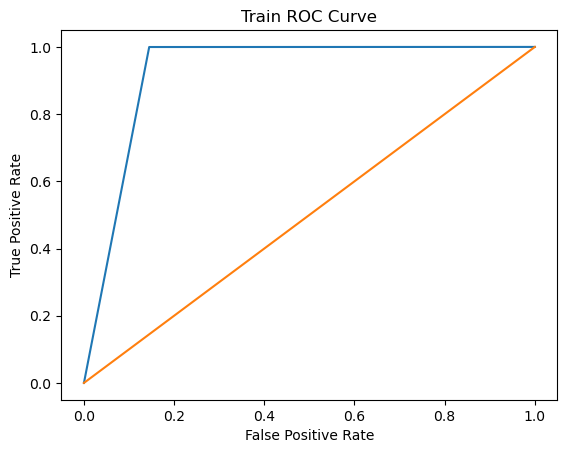

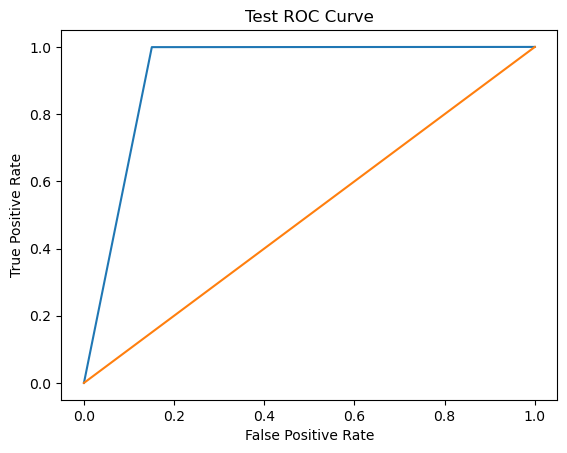

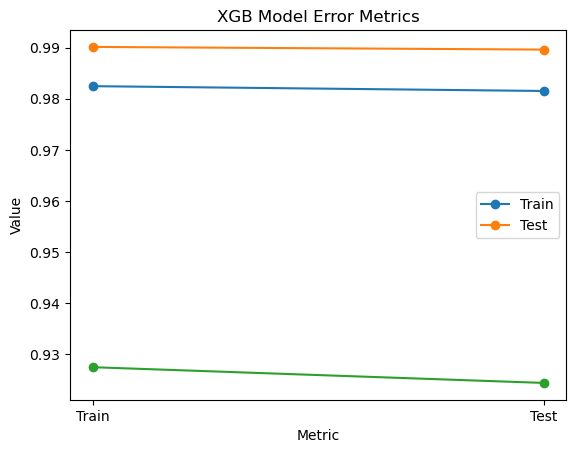

In [37]:

xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              n_estimators = 500,
                              learning_rate = 0.01,
                              subsample = 0.8,
                              colsample_bytree = 0.7, 
                              max_depth = 7,
                              tree_method = 'hist',
                              enable_categorical = True,
                              eval_metric = 'auc',
                              random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

XGB_e_metrics_train = evaluate_classification_2(y_train,y_pred_train,'Train')
XGB_e_metrics_test = evaluate_classification_2(y_test,y_pred_test,'Test')

XGB_errors = pd.DataFrame([XGB_e_metrics_train], index=["Train"])
XGB_errors.loc["Test"] = XGB_e_metrics_test

plt.plot(XGB_errors,marker='o')
plt.legend(XGB_errors.index)

plt.title("XGB Model Error Metrics")
plt.xlabel("Metric")
plt.ylabel("Value")

plt.show()


In [38]:
XGB_errors

,accuracy,f1,roc score
Train,0.982459,0.990135,0.927498
Test,0.981519,0.989613,0.924424


For Linear Support Vector Classifier, there wasn’t as many options for hyperparameters to test so our grid tested out two different hyperparameters: the regularization value C (0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000) and the type of penalty ( L1, L2). We also used a squared hinge loss as that was the only type of loss available for SciKit-Learn’s Linear SVC model that could be used with an L1 norm penalty. After grid search, we found that the best performing classifier had a C value of 0.1 and used an L1 norm penalty, and it yielded an accuracy of 0.94, an f1_score of 0.97 and a ROC score of 0.77.



This is the hyperparameter grid we created to run the Support Vector Classifier (SVC). 

In [ ]:
svc = LinearSVC(random_state = 42)
linsvc_param_grid_f = [ 
    {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
    "penalty" : ["l1", "l2"],
    "loss" : [ "squared_hinge"],
    "dual" : [False],
    "max_iter": [1000000]}]

svm_search_results = get_hyperparameter_search_results(
                                            model = svc,
                                            df_train = X_train_processed.toarray(), 
                                            df_labels = y_train_binary, 
                                            search_type = "grid", 
                                            param_grid = linsvc_param_grid_f, param_distributions = {}, 
                                            n_iter = 1, 
                                            cv=5
                                                )

# svm_search_results

<img src="images/image.png" alt= “image” width="900" height="700">

In [ ]:
linSVC = LinearSVC(C=0.1, dual=False, max_iter=1000000, penalty='l1', random_state=42)

linSVC.fit(X_train_processed.toarray(), y_train)

linSVC_y_pred_train = evaluate_classification(y_train, linSVC.predict(X_train_processed.toarray()), "Train")
linSVC_y_pred_test = evaluate_classification(y_test, linSVC.predict(X_test_processed.toarray()), "Test")

linSVC_errors = pd.DataFrame([linSVC_y_pred_train], index=["Train"])
linSVC_errors.loc["Test"] = linSVC_y_pred_test

linSVC_errors

<img src="images/image_2.png" alt= “image2” width="500" height="400">

<img src="images/image_3.png" alt= “image3” width="500" height="400">


<img src="images/image_4.png" alt= “image4” width="300" height="150">

These results show that the XGBoost Classifier had the best performance out of the three, with a slight edge over the Random Forest Classifier, which had the second best performance, and Linear SVC had the third best performance. This could be because an XGBoost Classifier is a very flexible ensemble method that, like a Random Forest Classifier, makes a series of decision trees and can be scaled to train models on very large datasets, but unlike Random Forest Classifiers, it makes new trees based off of the errors of the previous ones. We used the XGBoost Classifier from the XGB library, which also has built-in support for categorical data that could have made the classifier perform better on our categorical features. Additionally, the lower performance of the Linear Support Vector Classifier could indicate that the data isn’t very linearly separable, and it could have also been due to the XGBoost Classifier and Random Forest Classifier having more hyperparameters to test during Grid Search.




# Discussion

### Interpreting the result

Our main point from our results was that since we got very high scores for accuracy, F1 score and ROC score, this indicates that using information about the employers on H1B applications as features can be very influential in predicting whether an H1B application is approved or not. Our scores on these metrics for all of our classifiers were much higher than the scores the baseline models got. 
Also, our accuracy scores for the different classifiers we used fell in the range of 90% to 98%, whereas the accuracy scores of two of our research articles fell around 80% to 92%.This difference could be due to the fact that these research articles didn’t use much information about the employers to predict case status, while ours did use employer information that was relevant to whether an H1B application was certified or not. This is further supported by the other research article we looked at, which did use some employer metrics like worksite location and had accuracy scores around 95% for the two models it used.

Additionally, the performance of the Random Forest and XGBoost Classifiers in predicting case status emphasizes the usefulness of tree-based models for classification tasks. We observed that these models performed closely in terms of accuracy, f1 score and ROC score, whereas Linear SVC had relatively poorer performance. All in all, our results suggest that tree-based models are very accurate classifiers for predicting case status.

Finally, having classifiers that can test many different hyperparameters works best for predicting case status. We noticed that the more hyperparameters we added to our classifiers, the higher accuracy we got using our evaluation metrics. By searching through multiple hyperparameters with multiple types of settings, we allowed more complex procedures to be applied in order to find the best hyperparameters for our model. Our results highlight this point because XGBoost and Random Forest Classifier had 4 and 5 hyperparameters respectively with multiple settings for each one, and both gave very similar accuracy results, approximately 98%. However, when we ran the Linear SVC model, a model that doesn’t have as many meaningful hyperparameters you can test out, we noticed that the accuracy was worse in comparison to the other classifiers, with an accuracy score of around 92%.

### Limitations

1. Data quality and completeness <br>
    * Data used for models may not be complete or accurate, which can lead to incorrect predictions. The dataset was missing information from certain applications and years. We feel that may have   impacted the accuracy of our models’ predictions.
2. Imbalanced classes <br>
    * Since we have more certified applications than not certified ones, the models we used may be biased towards predicting the majority. If the dataset contains more certified ones, the model may have difficulty accurately predicting the not certified cases.
3. Generalization <br>
    * We may have our model perform well on data it was trained on, however it may not generalize well to unseen data. If the distribution changes for years we do not have data for, we could see that there may be other factors affecting case status that we did not have present when we were training.
4. Confounding variables <br>
    * Our study was focused on the employer’s information and not on the applicant demographics. There are many variables that we did not account for because they were not present in our dataset, such as level of education for applicants, work experience, industry all of which could affect their case status.
5. Lack of interpretability <br>
    * ML models may be hard to interpret, when they are complex. We may have a danger of possibly overfitting when we make certain predictions or identify biases or errors in the model. This could be the case for our Random Forest Classifier since it had a high number of trees and high maximum depth for each tree.


### Ethics & Privacy

There are several ethics and privacy concerns with the dataset we have chosen regarding H1-B Non Immigrant Labour Visa. The dataset that we have is anonymous, however, with the features described, employees could be re-identified, as the dataset contains information regarding the city, state, and zip code of both the employer and employee. However, to address this, we will refrain from using information of the employee in our project. The dataset also avoids proxy discrimination, as we are not using features such as race, origin, sex, and age, rather using attributes from the company. As far as bias, since we are mainly going to be using columns regarding the employer and the case status, and disregarding columns related to the employee. As we are reducing the number of columns used, we could be missing some potential variables that could lead to biased predictions in our results regarding the approval of visas. To address this we will use evaluation metrics that mitigate bias. In terms of the impact of our work, it's important to consider the potential consequences of the decisions that are made based on your analysis. For example, if our analysis suggests that certain employers are more likely to receive H1-B visas than others, this could have a significant impact on the job market and on the lives of the people involved. It's therefore important to take steps to mitigate any potential biases in our analysis, and to ensure that your work is fair, accurate, and ethical.

### Conclusion

In conclusion, we found that using employer information such as employer name and location resulted in better predictions of whether an H1B application will be approved or not. This is shown by the strong performance of our models compared to our baseline models as well as previous literature on this topic. The results from this project highlights the importance of the employer’s role in the H1B application, and could pave the way for more research into what features of an employer can contribute to an H1B application’s approval. We also hope to repeat this project using H1B data from 2023 and more recent years to see if our findings will still hold up on recent data.


# Footnotes
<a name="mpinote"></a>1.[^](#mpinote): Migration Policy Institute. (2022). H-1B Temporary Skilled Worker Program. Retrieved February 22, 2023, from https://www.migrationpolicy.org/article/h-1b-temporary-skilled-worker-program.<br> 
<a name="iqbalnote"></a>2.[^](#iqbalnote): M. Tariq Iqbal, M. Irfan Ullah, M. Ahsan Nazir, "A Hybrid Algorithm for Optimal Placement and Sizing of Distributed Generation in a Distribution System", IEEE Access, vol. 7, pp. 174089-174102, 2019. doi: 10.1109/ACCESS.2019.2953292. https://ieeexplore.ieee.org/abstract/document/8933628<br>
<a name="rananote"></a>3.[^](#rananote): Rana, P., Kumar, S., & Yadav, S. (2019). An allotment of H1B work visa in USA using machine learning. International Journal of Recent Technology and Engineering, 8(3S), 539-545. Available from: https://www.researchgate.net/profile/Prashant-Rana-4/publication/328488339_An_allotment_of_H1B_work_visa_in_USA_using_machine_learning/links/5d70f092a6fdcc9961afad48/An-allotment-of-H1B-work-visa-in-USA-using-machine-learning.pdf.<br>
<a name="paulnote"></a>4.[^](#paulnote): Paul, U., & Langlois, A. (2022). Understanding the Determinants of H-1B Decisions: A Machine Learning Approach. Northeastern University, College of Social Sciences and Humanities. Retrieved February 22, 2023, from https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4143882<br>

